Done with Alexandra Nagy. 

In [1]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

In [2]:
from sklearn.datasets import make_blobs
labels = ["b","r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y<10))

plt.scatter(X[:,0], X[:,1], c=y, lw=0, s=40)
plt.xlabel("Feature1")
plt.ylabel("Feature2")

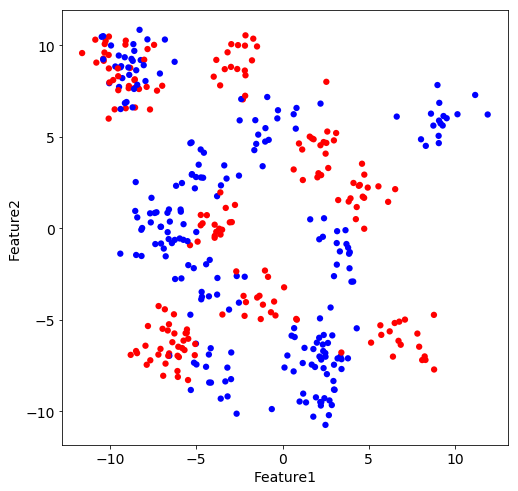

In [3]:
plt.show()

In [5]:
#Splitting of the data, arbitrary splitting since we don't know anything about the data set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

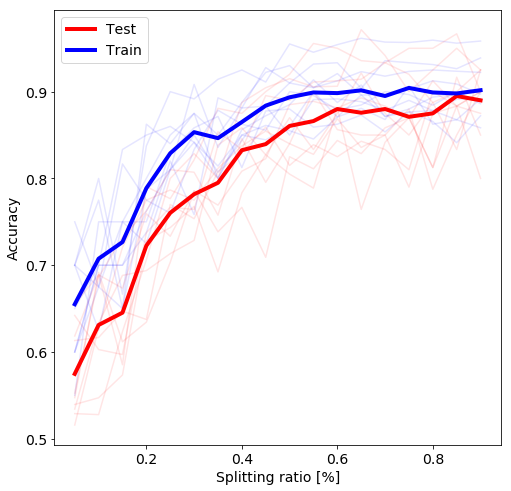

In [21]:
# Let's do a loop over the ratio values in order to find the optimal value.
# We don't want to be either in over- or under-fitting.
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
acc_mean_test = []
acc_mean_train = []
rge = np.arange(0.05,0.95,0.05)
for n in range(10):
    X, y = make_blobs(n_samples=400, centers=23, random_state=20+n)
    y = np.take(labels, (y < 10))
    train_acc = []
    test_acc = []
    for rat in rge:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=rat)
        clf.fit(X_train,y_train)
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    
    acc_mean_test.append(test_acc)
    acc_mean_train.append(train_acc)
    plt.plot(rge, train_acc, c='b', alpha = 0.1)
    plt.plot(rge, test_acc, c='r', alpha = 0.1)

plt.plot(rge, np.array(acc_mean_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(rge, np.array(acc_mean_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('Splitting ratio [%]')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
# Of course the training set is well fitted because it is the training set

# We can see a plateau coming in the testing data around rat=0.6, so we can guess that it's
# not worth using a greater ratio since we will just be overfitting and losing some data. 

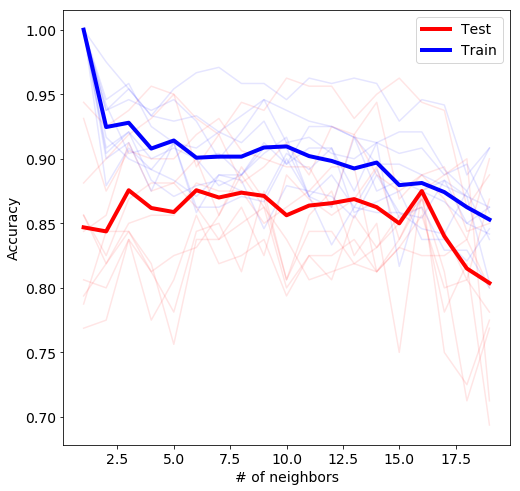

In [20]:
# Let's focus on the number of neighbors now. The procedure is basically the same
from sklearn.neighbors import KNeighborsClassifier
acc_mean_test = []
acc_mean_train = []
rge = np.arange(1,20,1)
for n in range(10):
    X, y = make_blobs(n_samples=400, centers=23, random_state=20+n)
    y = np.take(labels, (y < 10))
    train_acc = []
    test_acc = []
    for k in rge:
        clf = KNeighborsClassifier(n_neighbors=k)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
        clf.fit(X_train,y_train)
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    
    acc_mean_test.append(test_acc)
    acc_mean_train.append(train_acc)
    plt.plot(rge, train_acc, c='b', alpha = 0.1)
    plt.plot(rge, test_acc, c='r', alpha = 0.1)

plt.plot(rge, np.array(acc_mean_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(rge, np.array(acc_mean_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('# of neighbors')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [22]:
# By increasing the number of neighbors, we kind of lower the resolution of our computation. 

# So we have to find an in-between too few and too many in order to catch the properties of the system
# without losing to much information in averaging over the neighbors